In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales.csv")

In [4]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [5]:
df.isna().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


**Initial Data Cleaning: <p>**
Converted the Date column to datetime and cleaned the Amount column by removing $ and commas, then checked for missing values and duplicates, dropping the latter.

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Amount'] = df['Amount'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().astype(float)

print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

Missing Values:
 Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Duplicate Rows: 0


**Data Overview:** <p>
Displayed data types of all columns using df.dtypes, generated descriptive statistics with df.describe(), and printed the number of unique values and their counts for categorical columns (Sales Person, Country, Product) using nunique() and value_counts().

In [8]:
print("\nData Types:\n", df.dtypes)

print("\nDescriptive Statistics:\n", df.describe())

print("\nUnique Values in Categorical Columns:")
for col in ['Sales Person', 'Country', 'Product']:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())


Data Types:
 Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object

Descriptive Statistics:
                                 Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145

Unique Values in Categorical Columns:

Sales Person: 25 unique values
Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            5

**Distribution of Sales Amount**

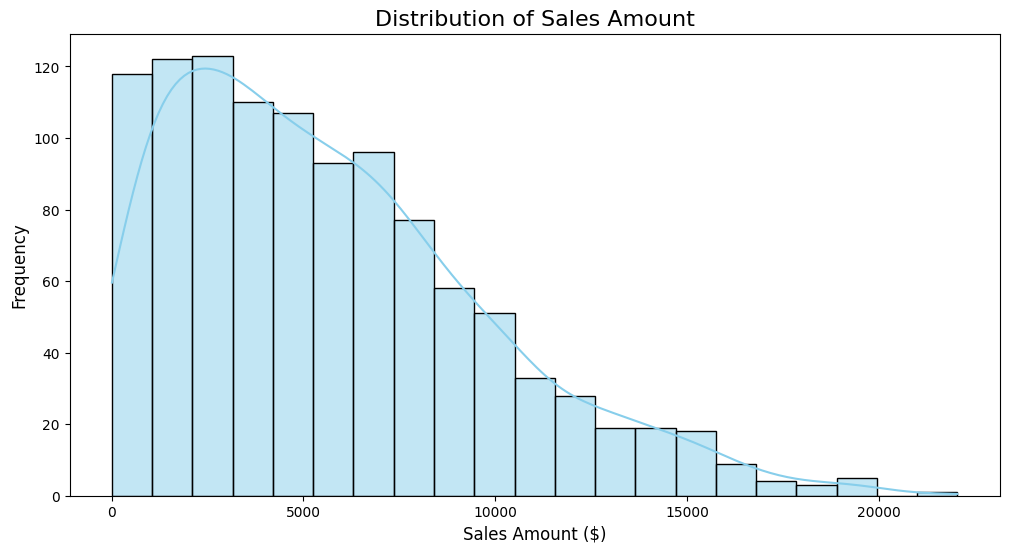

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], kde=True, color='skyblue')
plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

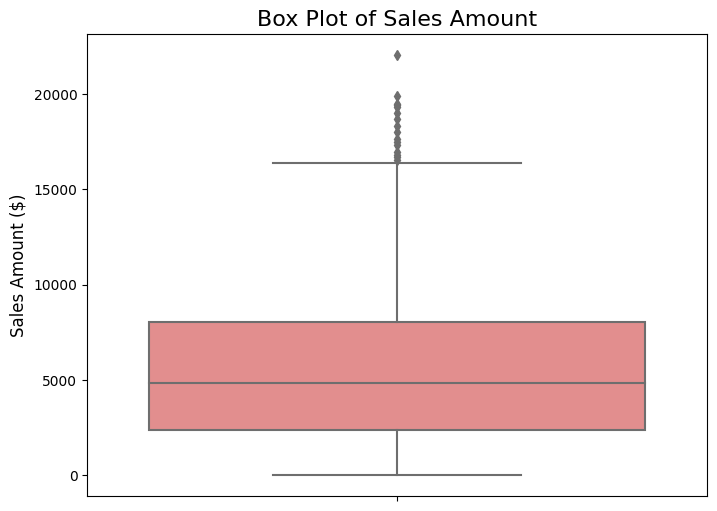

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Amount'], color='lightcoral')
plt.title('Box Plot of Sales Amount', fontsize=16)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.show()

**Sales by Country**

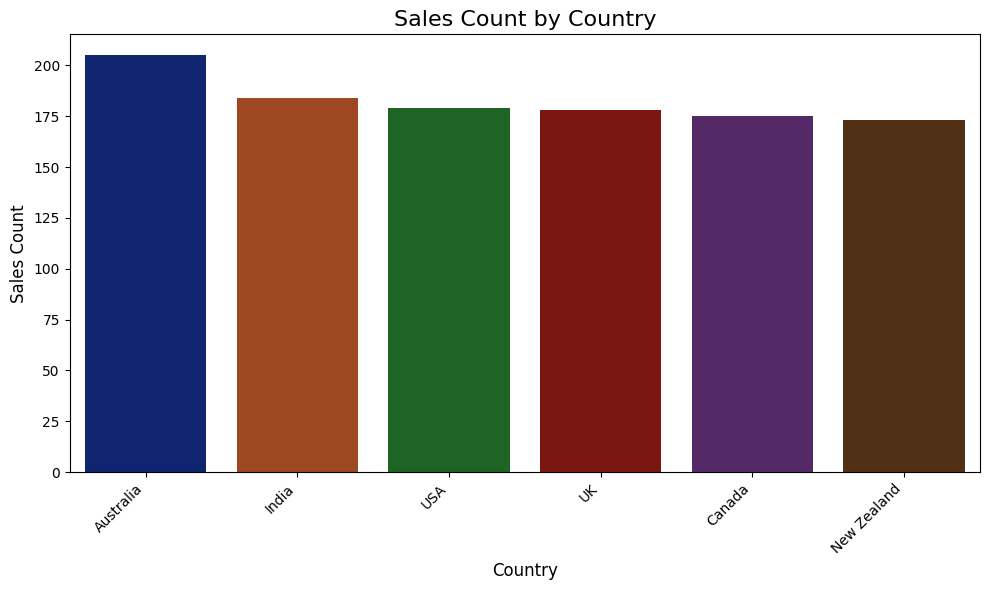

In [22]:
plt.figure(figsize=(10, 6))
order = df['Country'].value_counts().index
sns.countplot(x='Country', data=df, palette='dark', order = order)
plt.title('Sales Count by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sales by Product**

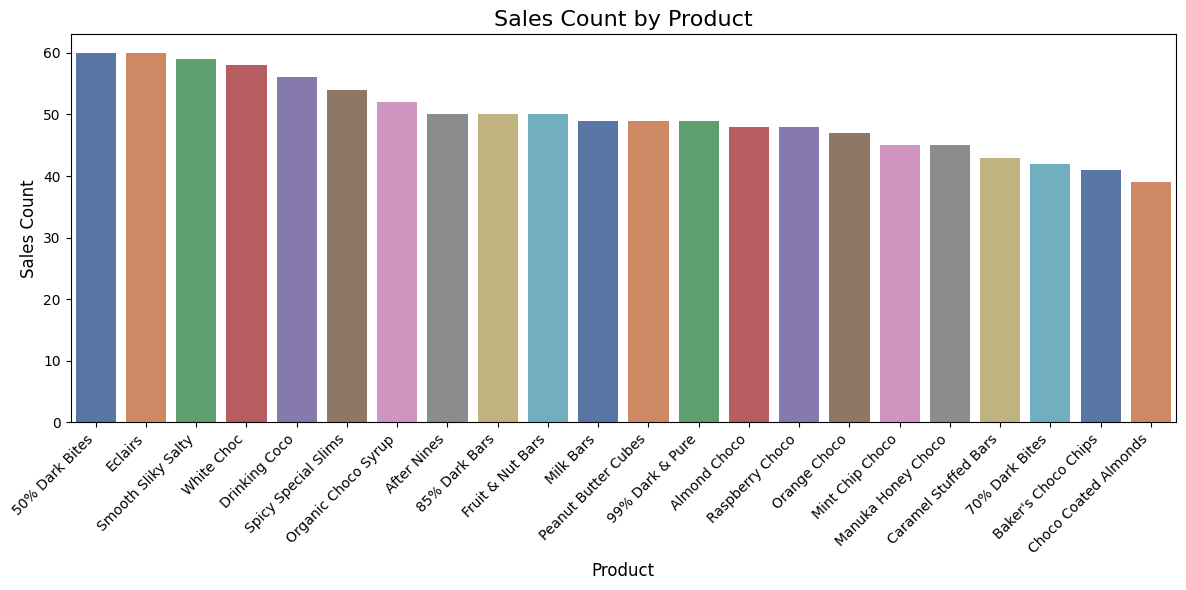

In [21]:
plt.figure(figsize=(12, 6))
order = df['Product'].value_counts().index
sns.countplot(x='Product', data=df, palette='deep', order = order)
plt.title('Sales Count by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sales by Sales Person**

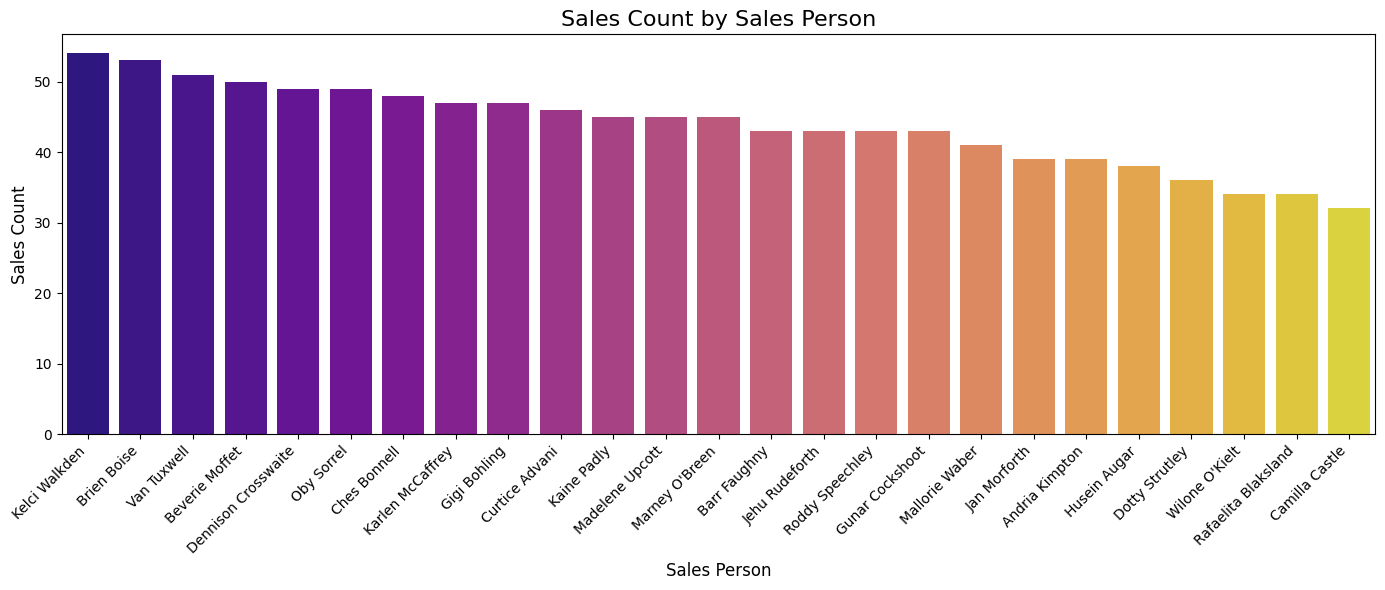

In [20]:
plt.figure(figsize=(14, 6))
order = df['Sales Person'].value_counts().index
sns.countplot(x='Sales Person', data=df, palette='plasma', order = order)
plt.title('Sales Count by Sales Person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sales Over Time**

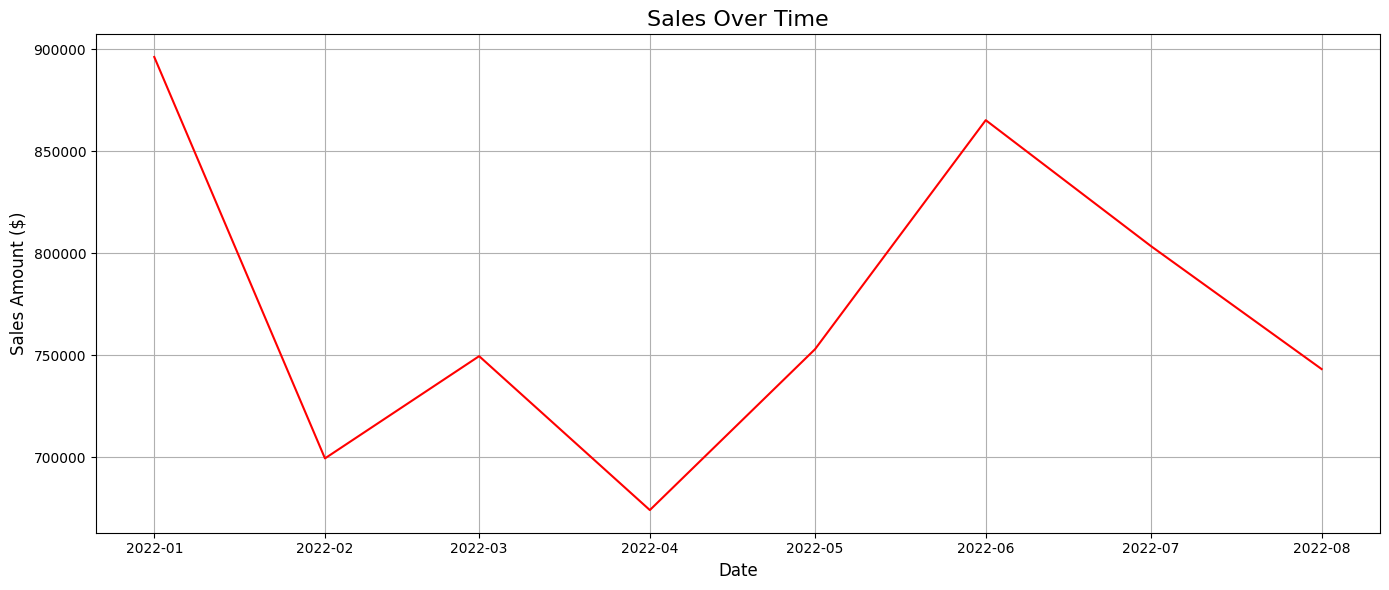

In [26]:
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum().reset_index()
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Amount', data=sales_over_time, color='red')
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Boxes Shipped Distribution**

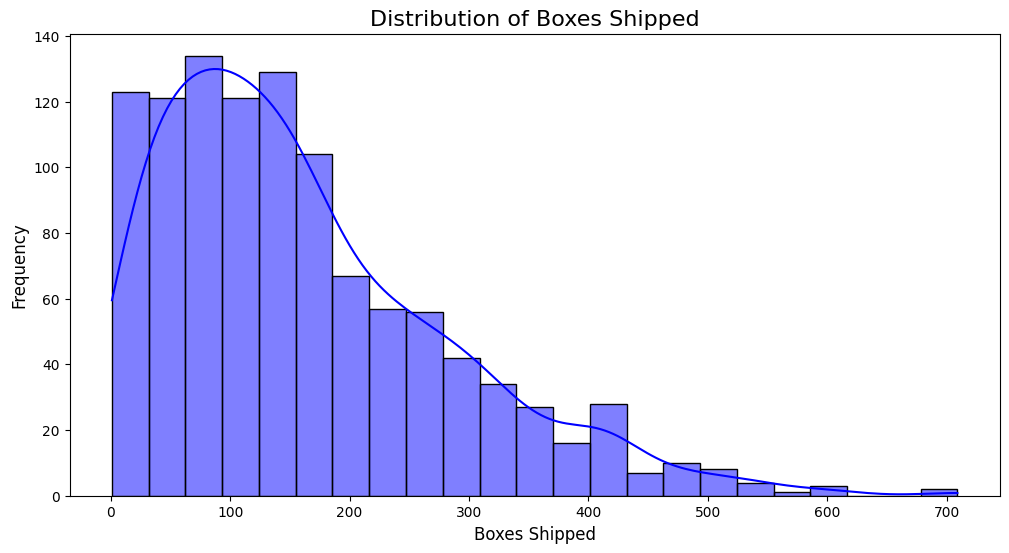

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Boxes Shipped'], kde=True, color='blue')
plt.title('Distribution of Boxes Shipped', fontsize=16)
plt.xlabel('Boxes Shipped', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

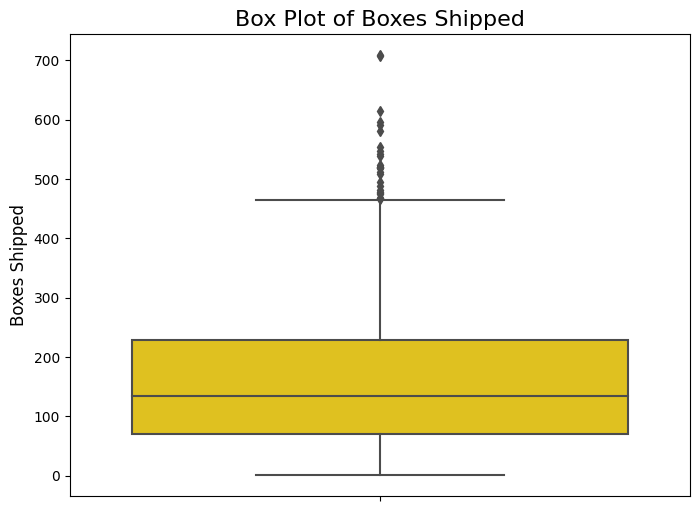

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Boxes Shipped'], color='gold')
plt.title('Box Plot of Boxes Shipped', fontsize=16)
plt.ylabel('Boxes Shipped', fontsize=12)
plt.show()

**Sales Trends by Country and Product**

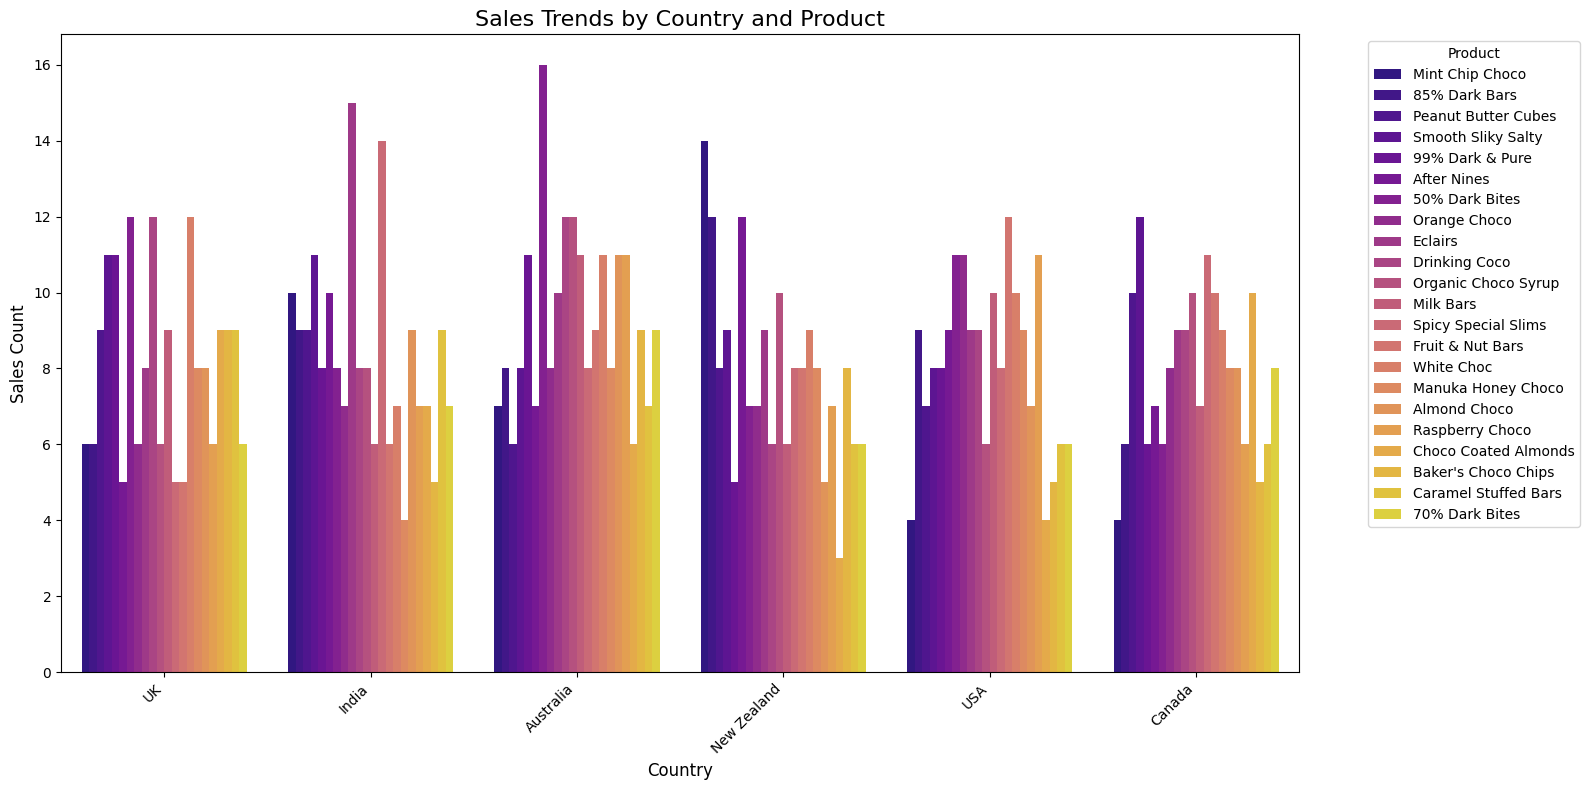

In [36]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', hue='Product', data=df, palette='plasma')
plt.title('Sales Trends by Country and Product', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Sales Person performance analysis**

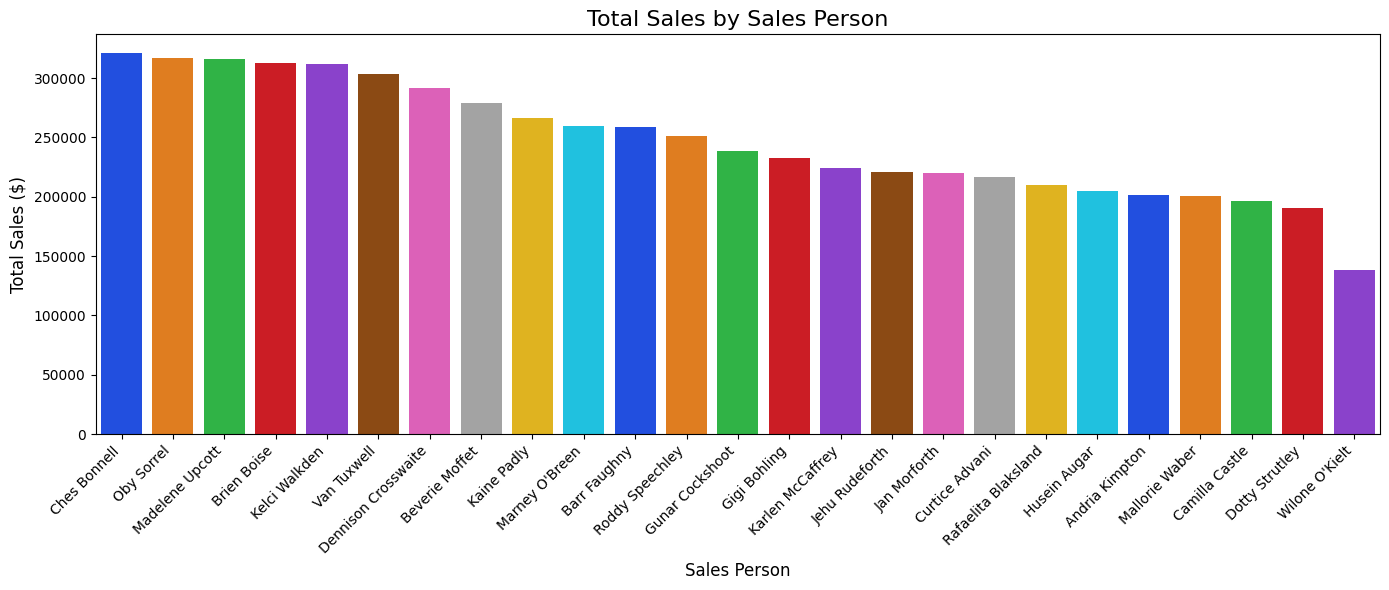

In [40]:
sales_person_sales = df.groupby('Sales Person').agg({'Amount': ['sum', 'mean']}).reset_index()
sales_person_sales.columns = ['Sales Person', 'Total Sales', 'Average Sales']
sales_person_sales = sales_person_sales.sort_values('Total Sales', ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x = 'Sales Person', y = 'Total Sales', data = sales_person_sales, palette = 'bright')
plt.title('Total Sales by Sales Person', fontsize=16)
plt.xlabel('Sales Person', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()